Homework 2 
Mimi Phan

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
df = pd.read_csv("possum.csv")

In [50]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [51]:
print(df.shape)

(104, 14)


<AxesSubplot:xlabel='totlngth', ylabel='hdlngth'>

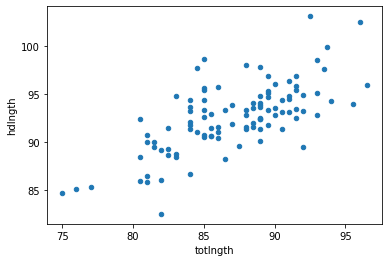

In [52]:
df.plot(kind='scatter', x='totlngth', y='hdlngth') 

In [53]:
from scipy import stats

In [54]:
def linear_line(x, m, b):
    y = m*x + b
    return y

    y = linear_line(x, m, b)


In [63]:
stats.linregress(df["hdlngth"], df["totlngth"])

LinregressResult(slope=0.8336697990278819, intercept=9.888233331751707, rvalue=0.6910936973935056, pvalue=4.680578654379419e-16, stderr=0.08632851506979797, intercept_stderr=8.000161952399203)

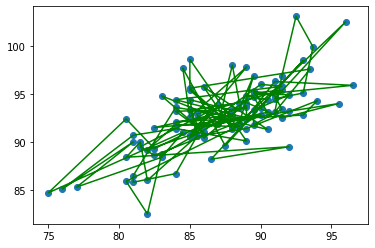

In [62]:
plt.scatter(df["hdlngth"], df["totlngth"])
plt.plot(df["hdlngth"], linear_line(df["totlngth"], color='green')